# non-parametric correlation test
# Spearman's Rank Correlation

In [142]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy
#!pip uninstall -y scipy
#!pip install scipy

!pip install statsmodels

print('\nDone installing packages!')


Done installing packages!


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


from scipy import stats

from scipy.stats import norm
from scipy.stats import linregress
from scipy.stats import spearmanr
from scipy.stats import pearsonr

---
# non-parametric correlation test
# Spearman's Rank Correlation
---

The **Spearman's Rank Correlation Coefficient** is a test for how well two variables are related through a monotonic function.
> A monotonic function is a entirely increasing or decreasing function, e.g. $f(x) = x$, $f(x) = x^3$

It measures the strength and direction of the monotonic relationship between those two variables. 

If $X$ is a monotonic function of $Y$, the ranks are lineary related and the Spearman's Rank Correlation equals one. Thus, a correlation test is a test for linear dependence between variables.
> Although independence implies vanishing correlation, the converse of this statement is not true.

In [6]:
# Create an array of X values ranging from 0 to 5 in 0.1 steps
X = np.arange(0.1, 5.1, 0.1)

# Create an array of Y values calculated using a function
functiontype = 1

if functiontype == 1:
    Y = X
    functiontext = 'y(x) = x'
elif functiontype == 2:
    Y = X**3
    functiontext = 'y(x) = x^3'
elif functiontype == 3:
    Y = np.log(X)
    functiontext = 'y(x) = log(x)'
elif functiontype == 4:
    Y = np.sin(X)
    functiontext = 'y(x) = sin(x)'

# Create a dataframe using pandas
df = pd.DataFrame({'X': X, 'Y': Y})

# Create a new dataframe with the corresponding ranks
df_ranks = df.rank()

# Create subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot the original dataframe
ax1.plot(df['X'], df['Y'], label=functiontext,marker='o', markersize=3, linestyle='-')
ax1.set_title('Original Function')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()

# Plot the dataframe with the corresponding ranks
ax2.plot(df_ranks['X'], df_ranks['Y'], label='Ranks',marker='o', markersize=3, linestyle='-')
ax2.set_title('Ranks of the function')
ax2.set_xlabel('X_rank')
ax2.set_ylabel('Y_rank')
ax2.legend()

# Show the plot
plt.show()

The **Spearman's Rank Correlation Coefficient** is defined as,

### $\hat{\rho}_{Sp} = \frac{\sum^{N}_{n=1} \bigl(\textrm{rank}[X_n] - \mathbb{E}\bigl[\textrm{rank}[X_n]\bigr]\bigr) \cdot \bigl(\textrm{rank}[Y_n] - \mathbb{E}\bigr[\textrm{rank}[Y_n]\bigr]\bigr)}{\sqrt{\textrm{var}\bigr[\textrm{rank}[X_n]\bigr]\cdot\textrm{var}\bigr[\textrm{rank}[Y_n]\bigr]}}$ ,

which looks quite familiar to the "normal" correlation coefficient,

### $\hat{\rho} = \frac{\sum^{N}_{n=1} \bigl(X_n - \hat{\mu}_X \bigr) \cdot \bigl(Y_n - \hat{\mu}_Y \bigr)}{\sqrt{\textrm{var}\bigr[X_n\bigr]\cdot\textrm{var}\bigr[Y_n\bigr]}}$.


Since the ranks, $1,2,3,\ldots, N$ must occure exactly once and with equal probability, one can simplify the expecation value,

#### $\mathbb{E}\bigl[\textrm{rank}[X_n]\bigr] = \frac{1}{N}\sum^{N}_{i=1} i = \frac{N+1}{2}$.

Further, one can simplify the variance as,

#### $\textrm{var}\bigr[\textrm{rank}[X_n]\bigr] = \mathbb{E}\biggr[ \biggr( \frac{1}{N} \sum_{n=1}^{N} \textrm{rank}[X_n] - \mathbb{E}\bigl[\textrm{rank}[X_n]\bigr] \biggr)^2 \biggr]$$= \frac{N(N^2-1)}{12}$.

Since the same relations can be applied for $Y_n$, one can rewrite the **Spearman's Rank Correlation Coefficient** as,

### $\hat{\rho}_{Sp} = \frac{\sum^{N}_{n=1}\bigr(\textrm{rank}[X_n] - \frac{N+1}{2}\bigr) \cdot \bigr(\textrm{rank}[Y_n] - \frac{N+1}{2}\bigr)}{N(N^2-1) / 12}$.


> The attentive reader will note that these expressions are only valid if there are no ties.


The significance level for the Spearman's Rank Correlation can either be found in a variety of tables, or, for large sample sizes ($N>30$), one can invoke a special version of the **Central Limit Theorem**. 
Using the normal distribution approximations,

#### $\mathbb{E}\bigr[\hat{\rho}_{Sp} \bigr] \approx 0$,
#### $\mathrm{var}\bigr[\hat{\rho}_{Sp} \bigr] \approx \frac{1}{N-1}$,

the significance test for the Spearman's Rank Correlation can be performed by approximating 

### $z \approx \hat{\rho}_{Sp} \cdot \sqrt{N-1}$,

and reject the nullhypothesis if 

### $|z| > z_{\alpha/2}$

---

# The Problem
A scientist decides to investigate if ENSO does influence winter precipitation in the southeast United States?

He formulates the following hypothesis:

* $H_0$ : ENSO **does not** influence winter precipitation $\rightarrow \rho = 0 \rightarrow$ there is **no linear dependence** between the two data sets
* $H_A$ : ENSO **does** influence winter precipitation $\rightarrow  "\rho \neq 0" \rightarrow$ there is **linear dependence** between the two data sets

To investigate this question, a scientist wants to perform a **correlation test**. 

Since he is aware the fact, that ENSO and precipitation data are not normally distributed, he correctly chooses a non-parametric correlation test. Namely, the rank based **Spearman's Rank Correlation**. 

Thus, the scientist,
* 1.) collects precipitation data for the eight warmest and eight coldest ENSO events (1950-2016) in the southeast United States.
* 2.) sorts them in ascending order of ENSO values.
* 3.) ranks them seperately.
* 4.) calculates the expectation value for the ranked data sets.
* 5.) calculates the **Spearman's Rank Correlation Coefficient**.
* 6.) finally calculates the standardized variable $z$ and compares it with a suitable threshold $z_{\alpha/2}$.

The scientist will decied as followed:
* Reject $H_0$ if $|z| > z_{\alpha/2}$    
* Accept $H_0$ if $|z| < z_{\alpha/2}$  

---

# The implementation

### 1.) & 2.) One collects precipitation data for the eight warmest and eight coldest ENSO events (1950-2016) in the southeast United States and sorts them in ascending order of ENSO values.

In [7]:
data = {'Year': [1974, 1950, 1971, 1989, 2008, 2000, 1976, 1999, 1987, 1973, 2010, 1958, 1992, 1983, 1998, 2016],
        'Precip': [4.08, 3.16, 4.76, 3.6, 3.65, 3.24, 3.49, 3.69, 5.46, 5.26, 4.43, 4.35, 4.25, 5.64, 6.57, 3.96],
        'Nino': [-1.59, -1.57, -1.42, -1.41, -1.39, -1.3, -1.23, -1.19, 1.22, 1.22, 1.36, 1.55, 1.8, 2.02, 2.05, 2.28]
       }

df = pd.DataFrame(data)
df.set_index('Year', inplace=True) # set 'Year' column as index

df

Precip  Nino
Year              
1974    4.08 -1.59
1950    3.16 -1.57
1971    4.76 -1.42
1989    3.60 -1.41
2008    3.65 -1.39
2000    3.24 -1.30
1976    3.49 -1.23
1999    3.69 -1.19
1987    5.46  1.22
1973    5.26  1.22
2010    4.43  1.36
1958    4.35  1.55
1992    4.25  1.80
1983    5.64  2.02
1998    6.57  2.05
2016    3.96  2.28

### 3.) One ranks them seperately. 

In [8]:
# create a new DataFrame with the ranks of the Precip and Nino columns
df_ranks = df.rank(method='average')

df_ranks

Precip  Nino
Year              
1974     8.0   1.0
1950     1.0   2.0
1971    12.0   3.0
1989     4.0   4.0
2008     5.0   5.0
2000     2.0   6.0
1976     3.0   7.0
1999     6.0   8.0
1987    14.0   9.5
1973    13.0   9.5
2010    11.0  11.0
1958    10.0  12.0
1992     9.0  13.0
1983    15.0  14.0
1998    16.0  15.0
2016     7.0  16.0

> It is always useful to visualize the initial data

In [9]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
df.plot(kind='line', y='Precip', ax=ax1, marker='o', linestyle='', color='blue', markersize=5)
df.plot(kind='line', y='Nino', ax=ax1, marker='x', linestyle='', color='red', markersize=5)
ax1.set_ylabel('Precip / Nino')
ax1.legend(['Precip', 'Nino'])

sns.regplot(x='Nino', y='Precip', data=df, ax=ax2, color='green')
ax2.set_xlabel('Nino')
ax2.set_ylabel('Precip')

# Get the fitting parameters of the linear regression
x = df['Nino']
y = df['Precip']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print('Slope:', slope.round(2))
print('Intercept:', intercept.round(2))

plt.show()

Slope: 0.4
Intercept: 4.29


> now let us compare the initial data with the ranked one

In [10]:
# Create subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot the original dataframe
ax1.plot(df['Nino'], df['Precip'], label='Data',marker='o', markersize=5, linestyle='--',linewidth=0.5)
ax1.set_title('Original Function')
ax1.set_xlabel('Nino')
ax1.set_ylabel('Precipitation')
ax1.legend()

# Plot the dataframe with the corresponding ranks
ax2.plot(df_ranks['Nino'], df_ranks['Precip'], label='Ranks',marker='o', markersize=5, linestyle='--',linewidth=0.5)
ax2.set_title('Ranked Function')
ax2.set_xlabel('Nino_rank')
ax2.set_ylabel('Precipitation_rank')
ax2.legend()

# Show the plot
plt.show()

### 4.) One calculates the expectation value for the ranked data sets.

#### $\mathbb{E}\bigl[\textrm{rank}[X_n]\bigr] = \frac{1}{N}\sum^{N}_{i=1} i = \frac{N+1}{2}$

> by construction they are the same

In [11]:
print('\nThe expecation values are given by: \n')
df_ranks.mean()


The expecation values are given by: 



Precip    8.5
Nino      8.5
dtype: float64

### 5.) One calculates the **Spearman's Rank Correlation Coefficient**
To do so, one calculates the deviations from the expectation value:


### $\Delta \textrm{rank}[X_n] = \textrm{rank}[X_n] - \mathbb{E}\bigl[\textrm{rank}[X_n]\bigr] = \textrm{rank}[X_n] - \frac{N+1}{2}$

> visualize!

In [12]:
df_ranks_dev = df_ranks - df_ranks['Nino'].mean()
df_ranks_dev

Precip  Nino
Year              
1974    -0.5  -7.5
1950    -7.5  -6.5
1971     3.5  -5.5
1989    -4.5  -4.5
2008    -3.5  -3.5
2000    -6.5  -2.5
1976    -5.5  -1.5
1999    -2.5  -0.5
1987     5.5   1.0
1973     4.5   1.0
2010     2.5   2.5
1958     1.5   3.5
1992     0.5   4.5
1983     6.5   5.5
1998     7.5   6.5
2016    -1.5   7.5

In [13]:
# Create subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot the original dataframe
df_ranks_dev.plot(kind='line', y='Precip', ax=ax1, marker='o', linestyle='', color='blue', markersize=5)
df_ranks_dev.plot(kind='line', y='Nino', ax=ax1, marker='x', linestyle='', color='red', markersize=5)
ax1.set_title('Rank Deviations Time Series')
ax1.set_ylabel('Precip_rank_dev / Nino_rank_dev')
ax1.legend(['Precip', 'Nino'])

# Plot the dataframe with the corresponding ranks
ax2.plot(df_ranks_dev['Nino'], df_ranks_dev['Precip'], label='Ranks',marker='o', markersize=5, linestyle='--',linewidth=0.5)
ax2.set_title('Rank Deviations')
ax2.set_xlabel('Nino_rank_dev')
ax2.set_ylabel('Precipitation_ran_dev')
ax2.legend()

# Show the plot
plt.show()

Next, one multiplies the "Precipitation-deviations" with the "Nino-deviations" and sums them up

### $S =  \sum^{N}_{n=1} \Delta \textrm{rank}[X_n] \cdot \Delta \textrm{rank}[Y_n] = \sum^{N}_{n=1}\bigr(\textrm{rank}[X_n] - \frac{N+1}{2}\bigr) \cdot \bigr(\textrm{rank}[Y_n] - \frac{N+1}{2}\bigr)$

In [14]:
df_ranks_dev['Product'] = df_ranks_dev['Precip'] * df_ranks_dev['Nino']
S = df_ranks_dev['Product'].sum()

print(df_ranks_dev)
print('\nThe sum of the "Precipitation-deviations" and "Nino-deviations" product is: ',S)

      Precip  Nino  Product
Year                       
1974    -0.5  -7.5     3.75
1950    -7.5  -6.5    48.75
1971     3.5  -5.5   -19.25
1989    -4.5  -4.5    20.25
2008    -3.5  -3.5    12.25
2000    -6.5  -2.5    16.25
1976    -5.5  -1.5     8.25
1999    -2.5  -0.5     1.25
1987     5.5   1.0     5.50
1973     4.5   1.0     4.50
2010     2.5   2.5     6.25
1958     1.5   3.5     5.25
1992     0.5   4.5     2.25
1983     6.5   5.5    35.75
1998     7.5   6.5    48.75
2016    -1.5   7.5   -11.25

The sum of the "Precipitation-deviations" and "Nino-deviations" product is:  188.5


Finally, one has to divide the sum by the simplified variance term to acquire the Spearman's Rank Correlation Coefficient:
### $\hat{\rho}_{Sp} = \frac{\sum^{N}_{n=1}\bigr(\textrm{rank}[X_n] - \frac{N+1}{2}\bigr) \cdot \bigr(\textrm{rank}[Y_n] - \frac{N+1}{2}\bigr)}{N(N^2-1) / 12} = \frac{S}{N(N^2-1) / 12}$.

In [15]:
N = len(df_ranks_dev)
rho_SP = (12 * S) / (N * (N**2 -1))

print("Spearman rank correlation coefficient: ", rho_SP.round(2))

Spearman rank correlation coefficient:  0.55


> To calculate the **Spearman's Rank Correlation Coefficient** one could also use a variety of packages, e.g. *scipy.stats import spearmanr*

In [16]:
# calculate the Spearman rank correlation coefficient and p-value
corr_sp, pval_sp = spearmanr(df['Precip'], df['Nino'])

print("Spearman rank correlation coefficient: ", corr_sp.round(2))
print("p-value: ", pval_sp.round(3))

Spearman rank correlation coefficient:  0.55
p-value:  0.026


### 6.) Finally, one calculates the standardized variable $z$ and compares it with a suitable threshold $z_{\alpha/2}$.

The standardized variable $z$ can be computed by

### $z = \hat{\rho}_{Sp} \cdot \sqrt{N-1}$,

and one rejects the nullhypothesis if 

### $|z| > z_{\alpha/2}$

The standardized statistic variable is: z =  2.15
The 5% critical value for a normal distribution is: z_alpha/2 =  1.96

Since, abs(z) > z_alpha/2, the independence hypothesis has to be rejected!

Thus, one can claim that ENSO influences winter precipitation in observed region at the 5% significance level.


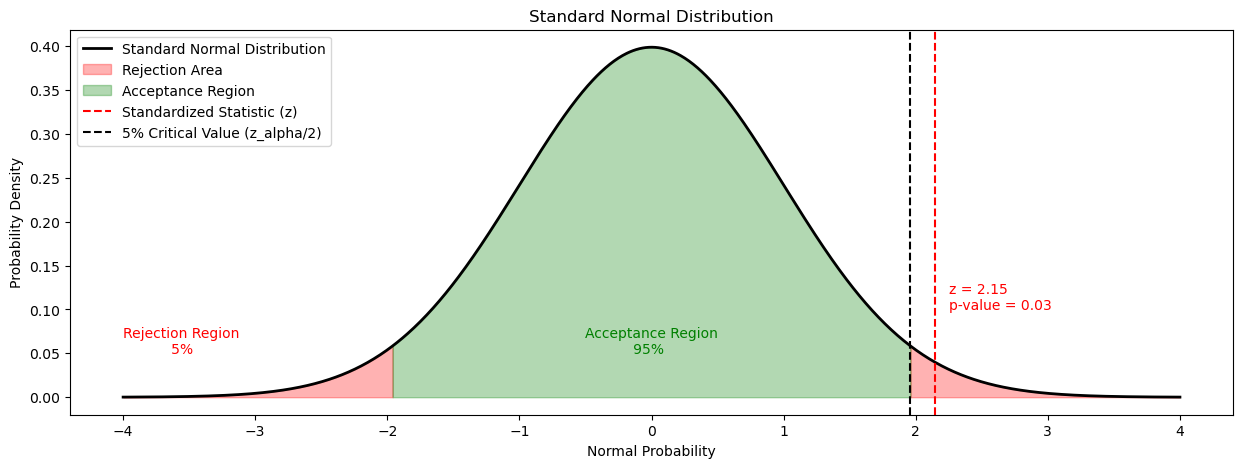

In [17]:
# calculate the standardized statistic
z = corr_sp * np.sqrt(len(df) - 1)
print('The standardized statistic variable is: z = ',z.round(2))


# Get 5% critical value for a standard normal distribution - since twotaild use 2.5%
z_alpha = norm.ppf(0.975)

print('The 5% critical value for a normal distribution is: z_alpha/2 = ', z_alpha.round(2))


if abs(z) < z_alpha:
    print('\nSince, abs(z) < z_alpha/2, the independence hypothesis cannot be rejected!')
    z_line_color = 'green'
else:
    print('\nSince, abs(z) > z_alpha/2, the independence hypothesis has to be rejected!')   
    print('\nThus, one can claim that ENSO influences winter precipitation in observed region at the 5% significance level.')
    z_line_color = 'red'

# Generate x values for the normal distribution plot
x = np.linspace(-4, 4, 1000)

# Calculate the y values for the normal distribution plot
y = norm.pdf(x, 0, 1)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the normal distribution curve
ax.plot(x, y, 'k-', linewidth=2, label='Standard Normal Distribution')

# Shade the area corresponding to the right rejection region
x_fill_r = np.linspace(z_alpha, 4, 100)
y_fill_r = norm.pdf(x_fill_r, 0, 1)
ax.fill_between(x_fill_r, y_fill_r, color='red', alpha=0.3, label='Rejection Area')

# Shade the area corresponding to the left rejection region
x_fill_l = np.linspace(-4,-z_alpha, 100)
y_fill_l = norm.pdf(x_fill_l, 0, 1)
ax.fill_between(x_fill_l, y_fill_l, color='red', alpha=0.3)

# Shade the area corresponding to the acceptance region
x_fill_critical = np.linspace(-z_alpha, z_alpha, 100)
y_fill_critical = norm.pdf(x_fill_critical, 0, 1)
ax.fill_between(x_fill_critical, y_fill_critical, color='green', alpha=0.3, label='Acceptance Region')

# Plot the vertical lines for the standardized statistic and critical value
ax.axvline(x=z, color=z_line_color, linestyle='--', label='Standardized Statistic (z)')
ax.axvline(x=z_alpha, color='k', linestyle='--', label='5% Critical Value (z_alpha/2)')

# Set labels and title
ax.set_xlabel('Normal Probability')
ax.set_ylabel('Probability Density')
ax.set_title('Standard Normal Distribution')

# Add legends
ax.legend(loc = 2)

# Add annotations for p-value and critical region
ax.annotate(f'z = {abs(z.round(2))}\np-value = {pval_sp.round(2)}', xy=(z + 0.1, 0.1), color='red')
ax.annotate(f'Acceptance Region\n           95%', xy=(-0.5, 0.05), color='green')
ax.annotate(f'Rejection Region\n           5%', xy=(-4, 0.05), color='red')

# Show the plot
plt.show()

Wunderful! We hae performed a Spearman's Rank Correlation test :D

---

Lets apply it on our example from the beginning:

Spearman:
Spearman rank correlation coefficient:  0.71
p-value:  0.0
The standardized statistic variable is: z =  4.97

Pearson:
Pearson rank correlation coefficient:  0.71
p-value:  0.0
The standardized statistic variable is: z =  4.94

The 5% critical value for a normal distribution is: z_alpha/2 =  1.96


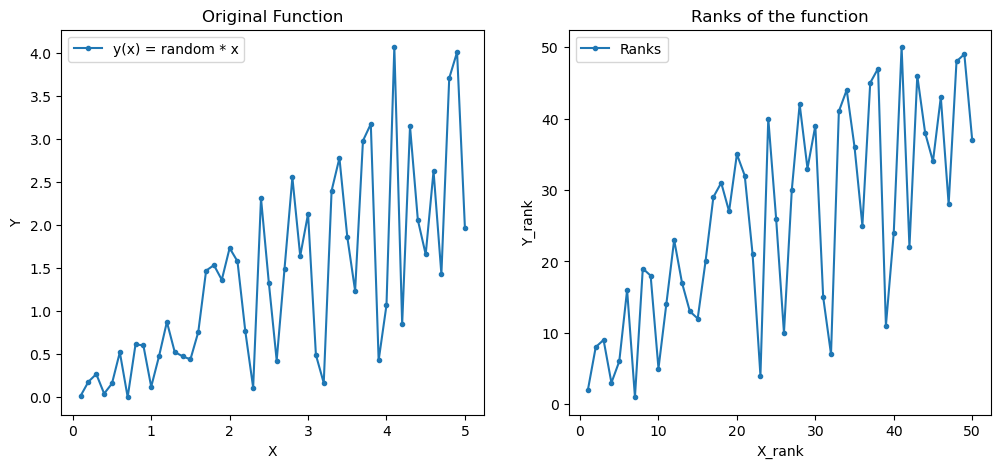

In [36]:
# Create an array of X values ranging from 0 to 5 in 0.1 steps
X = np.arange(0.1, 5.1, 0.1)

# Create an array of Y values calculated using a function
functiontype = 6

if functiontype == 1:
    Y = X
    functiontext = 'y(x) = x'
elif functiontype == 2:
    Y = X**3
    functiontext = 'y(x) = x^3'
elif functiontype == 3:
    Y = np.log(X)
    functiontext = 'y(x) = log(x)'
elif functiontype == 4:
    Y = np.sin(X)
    functiontext = 'y(x) = sin(x)'
elif functiontype == 5:
    Y = np.random.random(len(X))
    functiontext = 'y = random'
elif functiontype == 6:
    Y = np.random.random(len(X)) * X
    functiontext = 'y(x) = random * x'
    
# Create a dataframe using pandas
df = pd.DataFrame({'X': X, 'Y': Y})

# Create a new dataframe with the corresponding ranks
df_ranks = df.rank()

# calculate the Spearman rank correlation coefficient and p-value
corr, pval = spearmanr(df['X'], df['Y'])

print('Spearman:')
print("Spearman rank correlation coefficient: ", corr.round(2))
print("p-value: ", pval.round(3))

# calculate the standardized statistic
z = corr * np.sqrt(len(df) - 1)
print('The standardized statistic variable is: z = ',z.round(2))

      
# Perform Pearson correlation test
corr_pearson, pval_pearson = pearsonr(df['X'], df['Y'])

print('\nPearson:')
print("Pearson rank correlation coefficient: ", corr_pearson.round(2))
print("p-value: ", pval_pearson.round(3))

# calculate the standardized statistic
z_pearson = corr_pearson * np.sqrt(len(df) - 1)
print('The standardized statistic variable is: z = ',z_pearson.round(2))



# Get 5% critical value for a standard normal distribution - since twotaild use 2.5%
z_alpha = norm.ppf(0.975)

print('\nThe 5% critical value for a normal distribution is: z_alpha/2 = ', z_alpha.round(2))



# Create subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot the original dataframe
ax1.plot(df['X'], df['Y'], label=functiontext,marker='o', markersize=3, linestyle='-')
ax1.set_title('Original Function')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()

# Plot the dataframe with the corresponding ranks
ax2.plot(df_ranks['X'], df_ranks['Y'], label='Ranks',marker='o', markersize=3, linestyle='-')
ax2.set_title('Ranks of the function')
ax2.set_xlabel('X_rank')
ax2.set_ylabel('Y_rank')
ax2.legend()

# Show the plot
plt.show()

# Generate x values for the normal distribution plot
x = np.linspace(-4, 4, 1000)

# Calculate the y values for the normal distribution plot
y = norm.pdf(x, 0, 1)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the normal distribution curve
ax.plot(x, y, 'k-', linewidth=2, label='Standard Normal Distribution')

# Shade the area corresponding to the right rejection region
x_fill_r = np.linspace(z_alpha, 4, 100)
y_fill_r = norm.pdf(x_fill_r, 0, 1)
ax.fill_between(x_fill_r, y_fill_r, color='red', alpha=0.3, label='Rejection Area')

# Shade the area corresponding to the left rejection region
x_fill_l = np.linspace(-4,-z_alpha, 100)
y_fill_l = norm.pdf(x_fill_l, 0, 1)
ax.fill_between(x_fill_l, y_fill_l, color='red', alpha=0.3)

# Shade the area corresponding to the acceptance region
x_fill_critical = np.linspace(-z_alpha, z_alpha, 100)
y_fill_critical = norm.pdf(x_fill_critical, 0, 1)
ax.fill_between(x_fill_critical, y_fill_critical, color='green', alpha=0.3, label='Acceptance Region')

# Plot the vertical lines for the standardized statistic and critical value
ax.axvline(x=abs(z), color=z_line_color, linestyle='--', label='Standardized Statistic (z)')
ax.axvline(x=z_alpha, color='k', linestyle='--', label='5% Critical Value (z_alpha/2)')

# Set labels and title
ax.set_xlabel('Normal Probability')
ax.set_ylabel('Probability Density')
ax.set_title('Standard Normal Distribution')

# Add legends
ax.legend(loc = 2)

# Add annotations for p-value and critical region
ax.annotate(f'z = {abs(z.round(2))}\np-value = {pval_sp.round(2)}', xy=(abs(z) + 0.1, 0.1), color='red')
ax.annotate(f'Acceptance Region\n           95%', xy=(-0.5, 0.05), color='green')
ax.annotate(f'Rejection Region\n           5%', xy=(-4, 0.05), color='red')

# Show the plot
plt.show()

> If $X$ and $Y$ are independent and identically distributed normal random variables, then $\rho_{Sp}$ has an A.R.E of $0.912$ relative to Pearson's correlation. That means that Spearman's rank correlation requires about $9\%$ more samples to achieve the same level of performance than Pearson's correlation coefficient fot normal distributions

---
# Exam!

Now let use check if you are able to answer some conceptual questions:

## 1.) What are some advantages of rank-based hypothesis tests?

### Answer: 
   - They are non-parametric tests that do not rely on specific assumptions about the underlying distribution of the data, making them more robust to violations of assumptions.
   - They can be applied to data that are not normally distributed or have outliers.
   - They are suitable for ordinal or non-numeric data, as they only require the ordering of observations.

## 2.) What are some disadvantages of rank-based hypothesis tests?

### Answer: 
- They may have lower power compared to parametric tests when the assumptions of parametric tests are met.
- They may lose some information by converting the data into ranks and ignoring the actual values.

## 3.) When should you use the rank correlation rather than the Pearson correlation?

### Answer: 
- When I know that my two datasets have a monotonic but non-linear relationship. 
- When my records are affected by outliers.
- If my dates are categorical and not numerical.

## 4.) In your own words, describe the Wilcoxon Rank-Sum test.

### Answer: 
*In general:* The Wilcoxon Rank-Sum test, also known as the Mann-Whitney U test, is a non-parametric test used to compare the distributions of two independent samples. It assesses whether the samples were drawn from the same distribution. The test ranks all observations from both samples, sums the ranks of one sample, and makes use of a special Central Limit Theorem to calculate the z score.


## 5.) Suppose the Wilcoxon Rank-Sum test says there is a statistically significant difference between two samples. What general aspect of the samples do you expect to be different?

### Answer:
If the Wilcoxon Rank-Sum test indicates a statistically significant difference between two samples, we expect that there is a difference in the central tendency or location of the two distributions. Specifically, the medians of the two samples are likely to be different.

## 6.) What is the relative efficiency of a test?

### Answer:
The *relative efficiency* of a test compares the statistical power of one test to another. It quantifies how much more efficient one test is in detecting a specific alternative hypothesis compared to another test. 

## 7.) What are some reasons why the Wilcoxon Rank-Sum test might be recommended instead of the t-test?

### Answer:
- When the assumptions of the t-test are violated, such as non-normal distribution or the presence of outliers.
- When the data are measured on an ordinal scale or are non-numeric.
- When there is concern about the robustness of the results to deviations from normality.
- When the research question focuses on comparing the distributions or central tendencies rather than the means.

## 8.) In your own words, describe the rank correlation test

### Answer: 
The rank correlation test is a statistical measure that assesses the relationship between the rankings of two variables.

It determines how closely the rankings of one variable correspond to the ranking of another variable.

**Spearman's rank correlation coefficient** measures the strength (magnitude) and direction (sign) of the **monotonic** relationship between two variables.

In contrast to that, the **Pearson correlation coefficient** measures the strength and direction of the **linear** relationship between two variables.

Thus, the main difference between rank correlation tests and the normal correlation test lies in the type of relationship they assess. Rank correlation tests are appropriate when the relationship between variables is not necessarily linear but can be described by a monotonic function.

The coefficient ranges from $-1$ to $1$. 
If the coefficient is positive, it indicates a positive monotonic relationship. This means that as the values of one variable increase, the values of the other variable tend to increase as well, although not necessarily at a constant rate. Similarly, as the values of one variable decrease, the values of the other variable tend to decrease. If it is negative, they behave in the opposite way. The magnitude indicates the strength of the correlation, where $0$ represents no monotonic relationship, and $ \pm 1$ represents a perfect monotonic relationship.

## 9.) What is the advantage of the rank correlation test compared to a standard correlation test?

### Answer:
* **Robustness to outliers:** 
Since rank correlation is based on the relative order of the data points rather than their specific values, extreme values have less influence on the final result. 

* **Nonparametric nature:**
Rank correlation tests are nonparametric, meaning they do not assume any specific distributional form for the data. 

* **Applicable to ordinal or categorical data:**
These types of data do not have a natural numerical scale, and assuming a linear relationship between them may not be appropriate. By focusing on the ranks or order of the data points, rank correlation tests can capture the inherent ordering of the variables without requiring interval-level measurements.


* **Ease of interpretation:** 
Since it is based on the ranks, it provides a straightforward understanding of the relationship without the need to interpret in terms of specific units or scaling.

## 10.) Describe a situation in which the rank correlation and Pearson's correlation give different answers. Which one would be "right"? Now think of a situation in which the answers are different but the other one might be considered "right"

### Answer:
**1 Scenario: Outliers affecting the relationship**
Let's say you are studying the relationship between the hours spent studying and the exam scores of a group of students. Most of the students' data points follow a positive linear relationship, indicating that more study hours lead to higher exam scores. However, there are a few extreme outliers, representing students who didn't study much but still scored exceptionally well or vice versa.

In this case, **Pearson's correlation coefficient may be influenced by the outliers** and provide a weaker or even no significant relationship. On the other hand, **rank correlation is less affected by outliers**, as it focuses on the ranks rather than the specific values. Therefore, **Spearman's correlation may still capture the underlying monotonic relationship and provide a stronger correlation.**

Which one is **"right"?** In this situation, the **rank correlation may be considered more reliable** because it is less affected by outliers. It provides a robust measure of the monotonic relationship between study hours and exam scores, even if the specific values of a few extreme cases deviate from the overall trend.



**2 Scenario: Non-monotonic relationship with linear trend**
Consider a scenario where you are analyzing the relationship between the number of hours spent exercising per week and cardiovascular fitness levels of individuals. The relationship is such that initially, as individuals increase their exercise time, their fitness levels improve significantly. However, beyond a certain threshold, further increases in exercise time do not yield substantial improvements in fitness levels.

In this case, **Pearson's correlation coefficient may capture the linear trend of the relationship but fail to reflect the non-monotonic nature. It may show a moderate positive correlation,** indicating that more exercise time is associated with higher fitness levels. On the other hand, **rank correlation considers the ranks and monotonicity of the data points, and it may capture the non-monotonic pattern better, resulting in a weaker or no significant correlation.**

Which one is **"right"?** Here, it **depends on the specific question** or hypothesis being investigated. If the **focus is on the linear trend** and the overall association between exercise time and fitness levels, **Pearson's correlation may be considered more appropriate.** However, if the emphasis is on **capturing the monotonic or non-monotonic pattern, rank correlation might provide a more accurate representation.**